**`continuous_probabilistic_methods.py` or `continuous_probabilistic_methods.ipynb`**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Define a function named get_lower_and_upper_bounds that has two arguments:
- The first argument is a pandas Series. 
- The second argument is the multiplier, which should have a default argument of 1.5.

In [2]:
def get_lower_and_upper_bounds(df, feature, m = 1.5):
    '''
    get_lower_and_upper_bounds will take in a dataframe's feature:
    - calculate it's 1st & 3rd quartiles,
    - use their difference to calculate the IQR
    - then apply to calculate upper and lower bounds
    - using the `m` multiplier
    - default multiplier is '1.5'
    '''
    q1 = df[feature].quantile(.25)
    q3 = df[feature].quantile(.75)
    
    iqr = q3 - q1
    
    upper_bound = q3 + (m * iqr)
    lower_bound = q1 - (m * iqr)
    
    return upper_bound, lower_bound

1. Using [`lemonade.csv`](https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv) dataset and focusing on continuous variables:

In [3]:
url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"

df = pd.read_csv(url)

In [4]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [6]:
df.Date = pd.to_datetime(df.Date)

In [7]:
df=df.set_index('Date')

In [8]:
df['Month'] = df.index.month_name()

In [9]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January


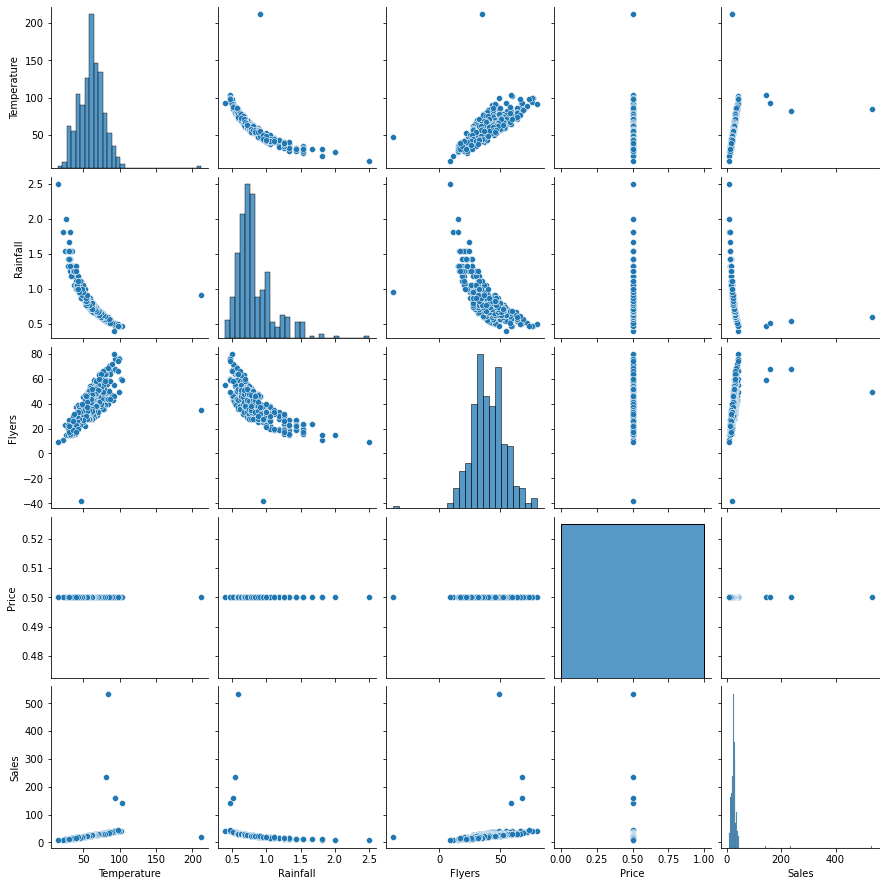

In [10]:
sns.pairplot(df)

In [11]:
columns = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']


Temperature


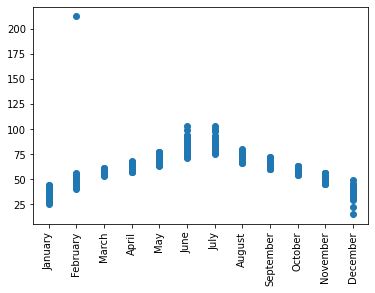

Rainfall


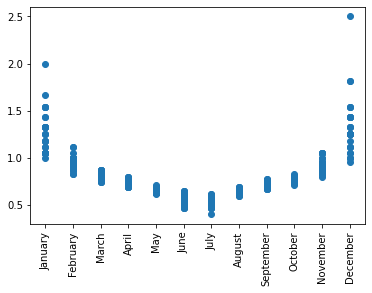

Flyers


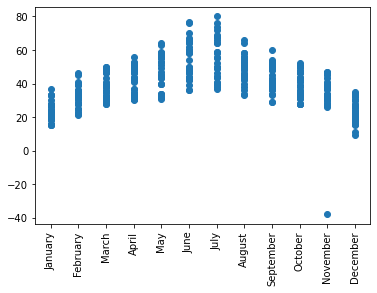

Price


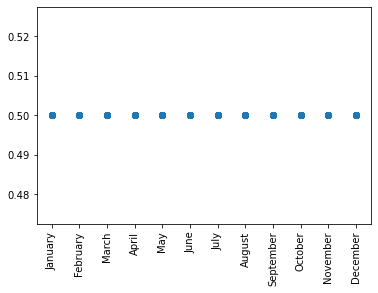

Sales


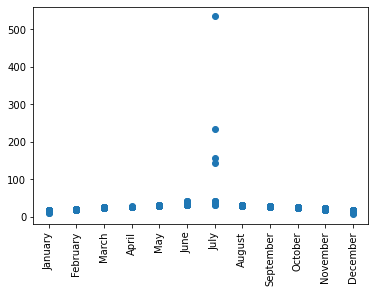

In [12]:
for col in columns:
    plt.scatter(df.Month, df[col])
    plt.xticks(rotation=90)
    print(col)
    plt.show()

Temperature


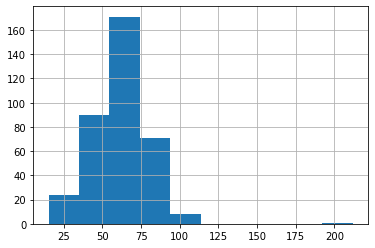

Rainfall


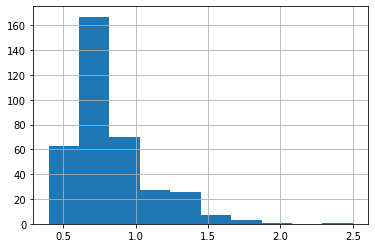

Flyers


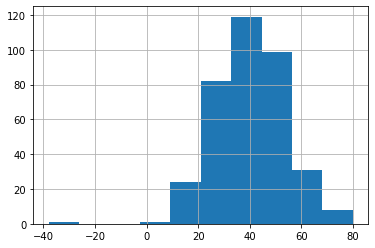

Price


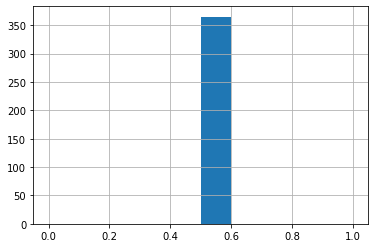

Sales


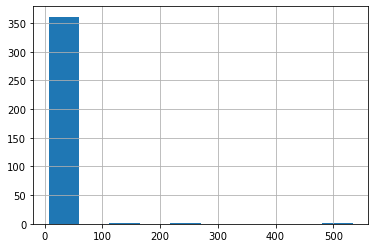

In [13]:
for col in columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        print(col)
        plt.show()

Temperature


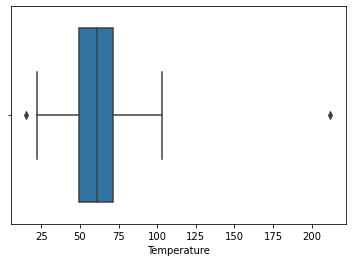

Rainfall


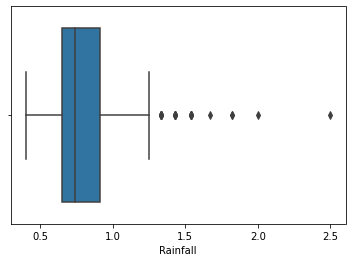

Flyers


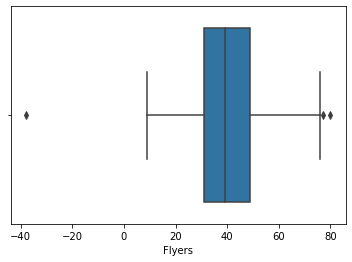

Price


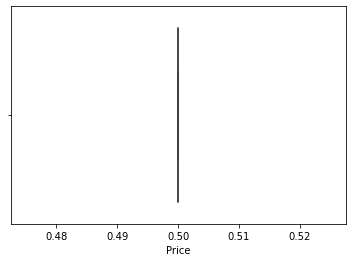

Sales


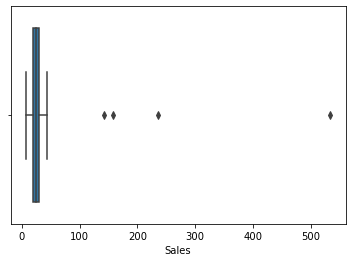

In [14]:
for col in columns:
    sns.boxplot(x=col, data=df)
    print(col)
    plt.show()

<AxesSubplot:>

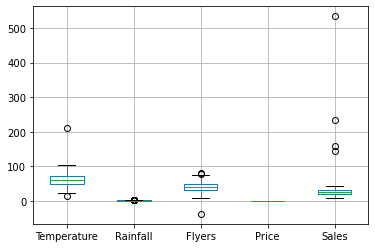

In [15]:
df.boxplot(column = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'])

1.1 Use the IQR Range Rule and the upper and lower bounds to:
- identify the **below** outliers of each column of `lemonade.csv`, using the multiplier of 1.5. 
    - Do these lower outliers make sense?
    - Which outliers should be kept? <font color="green">I think Rainfall & Price can be left alone.</font>
    
- identify the **above** outliers of each column of `lemonade.csv`, using the multiplier of 1.5. 
    - Do these lower outliers make sense?
    - Which outliers should be kept? <font color="green">I think Flyers & Price can be left alone.</font>

In [16]:
for col in columns:
    upper_bound, lower_bound = get_lower_and_upper_bounds(df, col, m = 1.5)
    print(col)
    print(upper_bound, lower_bound)

Temperature
104.7 16.700000000000003
Rainfall
1.3 0.26
Flyers
76.0 4.0
Price
0.5 0.5
Sales
45.0 5.0


Temperature


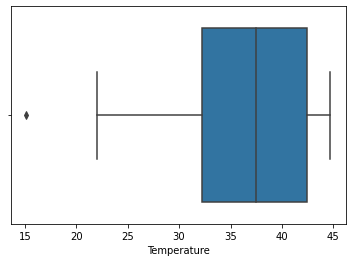

Rainfall


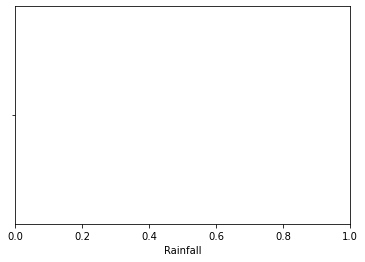

Flyers


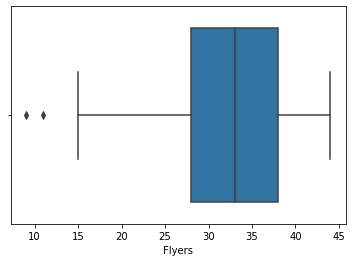

Price


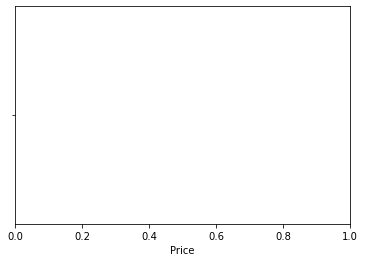

Sales


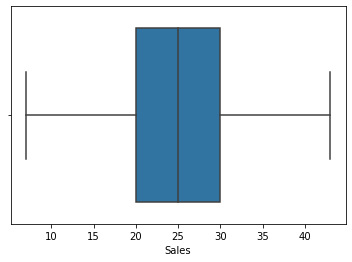

In [17]:
for col in columns:
    sns.boxplot(x=col, data= df[(df[col] < upper_bound) & (df[col] > lower_bound)])
    print(col)
    plt.show()

In [18]:
# at a multiplier of 1.5:
outliers = {}
for col in columns:
    if np.issubdtype(df[col].dtype, np.number):
        lower_bound, upper_bound = get_lower_and_upper_bounds(df, col)
        print(f' Lower bound for {col} : {lower_bound}\n Upper bound for {col}: {upper_bound}\n')
        print('-----------------')
        outliers[col] = {}
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        outliers[col]['df'] = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    else:
        pass

 Lower bound for Temperature : 104.7
 Upper bound for Temperature: 16.700000000000003

-----------------
 Lower bound for Rainfall : 1.3
 Upper bound for Rainfall: 0.26

-----------------
 Lower bound for Flyers : 76.0
 Upper bound for Flyers: 4.0

-----------------
 Lower bound for Price : 0.5
 Upper bound for Price: 0.5

-----------------
 Lower bound for Sales : 45.0
 Upper bound for Sales: 5.0

-----------------


In [19]:
outliers.keys()

dict_keys(['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'])

In [20]:
outliers['Temperature'].keys()

dict_keys(['bounds', 'df'])

In [21]:
outliers['Temperature']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January
...,...,...,...,...,...,...,...
2017-12-27,Wednesday,42.7,1.00,33,0.5,19,December
2017-12-28,Thursday,37.8,1.25,32,0.5,16,December
2017-12-29,Friday,39.5,1.25,17,0.5,15,December


1.2 Using the multiplier of **3**, IQR Range Rule, and the lower and upper bounds, identify the outliers **below** the lower bound in each column of `lemonade.csv`. 

1.2 Using the multiplier of **3**, IQR Range Rule, and the upper and lower bounds to:
- identify the **below** outliers of each column of `lemonade.csv`. 
    - Do these lower outliers make sense?
    - Which outliers should be kept? <font color="green">Price.</font>
    
- identify the **above** outliers of each column of `lemonade.csv`. 
    - Do these lower outliers make sense?
    - Which outliers should be kept? <font color="green">Rainfall, Flyers & Price .</font>

<AxesSubplot:>

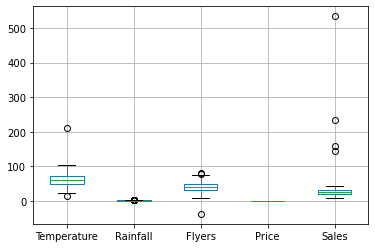

In [22]:
df.boxplot(column = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'])

In [18]:
for col in columns:
    upper_bound, lower_bound = get_lower_and_upper_bounds(df, col, m = 3)
    print(col)
    print(upper_bound, lower_bound)

Temperature
137.7 -16.299999999999997
Rainfall
1.69 -0.13
Flyers
103.0 -23.0
Price
0.5 0.5
Sales
60.0 -10.0


Temperature


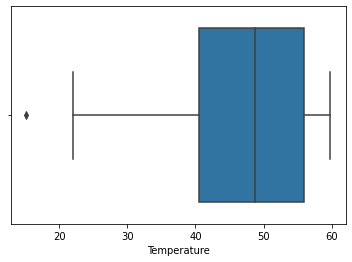

Rainfall


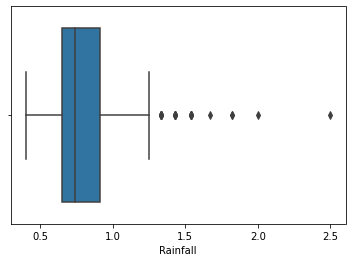

Flyers


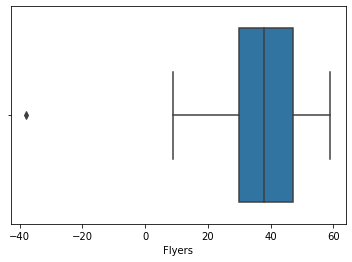

Price


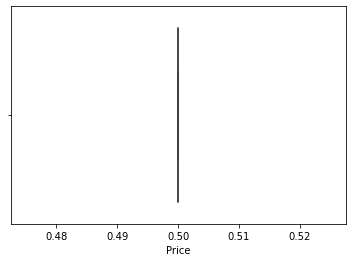

Sales


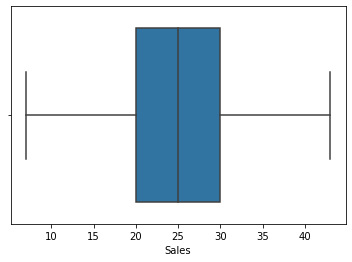

In [19]:
for col in columns:
    sns.boxplot(x=col, data=df[df[col] < upper_bound])
    print(col)
    plt.show()

In [25]:
df[(df[col] < upper_bound) & (df[col] > lower_bound)]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January
...,...,...,...,...,...,...,...
2017-12-27,Wednesday,42.7,1.00,33,0.5,19,December
2017-12-28,Thursday,37.8,1.25,32,0.5,16,December
2017-12-29,Friday,39.5,1.25,17,0.5,15,December


Temperature


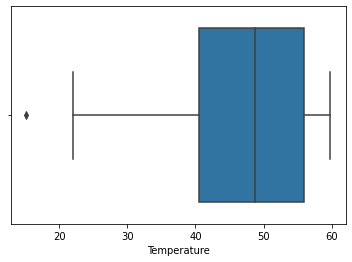

Rainfall


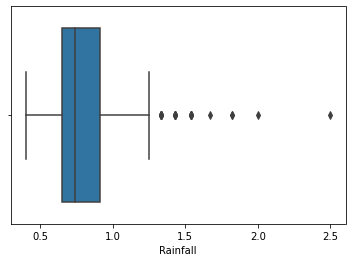

Flyers


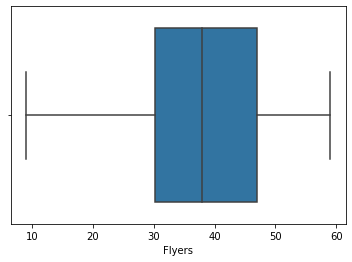

Price


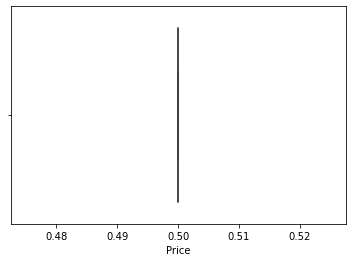

Sales


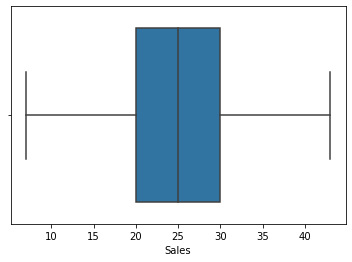

In [20]:
for col in columns:
    sns.boxplot(x=col, data= df[(df[col] < upper_bound) & (df[col] > lower_bound)])
    print(col)
    plt.show()

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
<font color="green">
- Temperature
- Flyers
</font>

Temperature


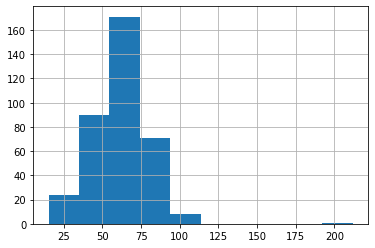

Rainfall


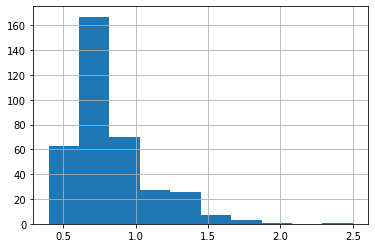

Flyers


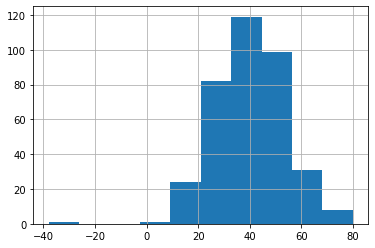

Price


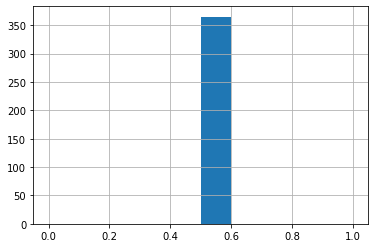

Sales


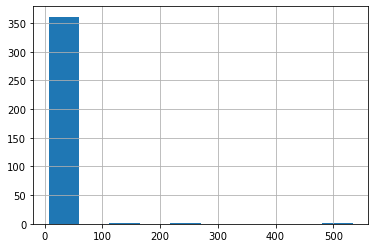

In [21]:
for col in columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        print(col)
        plt.show()

2.1 Use a 2 sigma decision rule to isolate the outliers.
- Do these make sense?
- Should certain outliers be kept or removed?<font color="green"></font>

In [30]:
for col in columns:
    z_scores = pd.Series((df[col] - df[col].mean()) / df[col].std())
    colname = 'z_scores_' + str(col)
    df[colname] = z_scores
    print('\n~~~~~~~~~~\n', col)
    print(df[z_scores.abs() >= 2])



~~~~~~~~~~
 Temperature
                 Day  Temperature  Rainfall  Flyers  Price  Sales     Month  \
Date                                                                          
2017-02-11  Saturday        212.0      0.91      35    0.5     21  February   
2017-06-16    Friday         99.3      0.47      77    0.5     41      June   
2017-06-26    Monday        102.6      0.47      60    0.5     42      June   
2017-07-01  Saturday        102.9      0.47      59    0.5    143      July   
2017-07-10    Monday         98.0      0.49      66    0.5     40      July   
2017-07-18   Tuesday         99.3      0.47      76    0.5     41      July   
2017-07-22  Saturday         99.6      0.47      49    0.5     42      July   
2017-07-27  Thursday         97.9      0.47      74    0.5     43      July   
2017-12-05   Tuesday         22.0      1.82      11    0.5     10  December   
2017-12-31    Sunday         15.1      2.50       9    0.5      7  December   

            z_scores_Tempe

3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [31]:
for col in columns:
    z_scores = pd.Series((df[col] - df[col].mean()) / df[col].std())
    colname = 'z_scores_' + str(col)
    df[colname] = z_scores
    
    print('\n~~~~~~~~~~\n', col)
    print(df[z_scores.abs() >= 3])


~~~~~~~~~~
 Temperature
                 Day  Temperature  Rainfall  Flyers  Price  Sales     Month  \
Date                                                                          
2017-02-11  Saturday        212.0      0.91      35    0.5     21  February   

            z_scores_Temperature  z_scores_Rainfall  z_scores_Flyers  \
Date                                                                   
2017-02-11              8.336627           0.306792        -0.370227   

            z_scores_Price  z_scores_Sales  
Date                                        
2017-02-11             NaN       -0.221847  

~~~~~~~~~~
 Rainfall
                Day  Temperature  Rainfall  Flyers  Price  Sales     Month  \
Date                                                                         
2017-01-01   Sunday         27.0      2.00      15    0.5     10   January   
2017-01-16   Monday         30.6      1.67      24    0.5     12   January   
2017-12-05  Tuesday         22.0      1.82      11 

In [30]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_scores_Temperature,z_scores_Rainfall,z_scores_Flyers,z_scores_Price,z_scores_Sales
Date,,,,,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January,-1.892340,4.286488,-1.820927,NaN,-0.577281
2017-01-02,Monday,28.9,1.33,15,0.5,13,January,-1.787286,1.840253,-1.820927,NaN,-0.480344
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January,-1.477652,1.840253,-0.950507,NaN,-0.415720
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January,-0.946852,0.817946,-0.877972,NaN,-0.351096
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January,-1.040848,0.635391,-0.515297,NaN,-0.318783


# Takin' Care Of Business

In [32]:
#remove most likely typo of negative Flyers anomoly
df['Flyers'] = df['Flyers'].abs()

<AxesSubplot:>

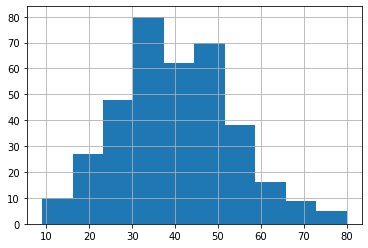

In [33]:
df['Flyers'].hist()

In [34]:
#address boiling temperature
df[df['Temperature'] > 200]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_scores_Temperature,z_scores_Rainfall,z_scores_Flyers,z_scores_Price,z_scores_Sales
Date,,,,,,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February,8.336627,0.306792,-0.370227,NaN,-0.221847


In [35]:
df.loc['2017-02-08': '2017-02-13']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_scores_Temperature,z_scores_Rainfall,z_scores_Flyers,z_scores_Price,z_scores_Sales
Date,,,,,,,,,,,,
2017-02-08,Wednesday,52.6,0.87,31,0.5,22,February,-0.476872,0.160748,-0.660367,NaN,-0.189535
2017-02-09,Thursday,42.7,1.00,39,0.5,19,February,-1.024260,0.635391,-0.080087,NaN,-0.286471
2017-02-10,Friday,50.0,0.91,40,0.5,20,February,-0.620631,0.306792,-0.007552,NaN,-0.254159
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February,8.336627,0.306792,-0.370227,NaN,-0.221847
2017-02-12,Sunday,55.6,0.83,41,0.5,22,February,-0.310997,0.014704,0.064983,NaN,-0.189535
2017-02-13,Monday,46.4,1.11,34,0.5,18,February,-0.819681,1.037012,-0.442762,NaN,-0.318783


In [36]:
df.loc['2017-02-11', 'Temperature'] = df.loc['2017-02-10']['Temperature']

In [37]:
df.loc['2017-02-11']

Day                     Saturday
Temperature                   50
Rainfall                    0.91
Flyers                        35
Price                        0.5
Sales                         21
Month                   February
z_scores_Temperature     8.33663
z_scores_Rainfall       0.306792
z_scores_Flyers        -0.370227
z_scores_Price               NaN
z_scores_Sales         -0.221847
Name: 2017-02-11 00:00:00, dtype: object

In [38]:
df[df['Temperature'] > 200]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_scores_Temperature,z_scores_Rainfall,z_scores_Flyers,z_scores_Price,z_scores_Sales
Date,,,,,,,,,,,,
